# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
path = r'C:\Users\user\kt에이블 학습\5주차\2일차'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [4]:
!pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1.pkl

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

file1 = 'data1.pkl'
path = 'C:\\Users\\user\\kt에이블 학습\\5주차\\2일차\\' 

data = joblib.load(path + file1)
data.head()

,Date,Cars,Submissions,Boardings,Avg_wait,Avg_fare,Avg_distance,target,temp_max,temp_min,...,humidity_min(%),sunshine(MJ/m2),Weekday,Month,Year,season,Weekend,holiday,Wait_MA7,Boarding_percent
6,2015-01-07,410,4085,3676,24.7,2230,8646,21.2,-0.2,-9.2,...,27.0,10.09,2,1,2015,Winter,0,0,23.371429,0.899878
7,2015-01-08,419,4030,3728,21.2,2231,8683,21.8,3.2,-6.8,...,38.0,8.74,3,1,2015,Winter,0,0,24.028571,0.925062
8,2015-01-09,424,4167,3813,21.8,2215,8506,41.2,4.3,-5.5,...,33.0,9.41,4,1,2015,Winter,0,0,26.171429,0.915047
9,2015-01-10,215,1916,1645,41.2,2447,11123,28.8,2.3,-4.0,...,39.0,9.60,5,1,2015,Winter,1,0,26.785714,0.858559
10,2015-01-11,187,1700,1572,28.8,2419,10806,23.2,3.4,-7.2,...,23.0,10.05,6,1,2015,Winter,1,0,26.357143,0.924706


## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [7]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(x= var, data = data, hue = hue_var)
        plt.grid()

        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()

In [8]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 접수건

,count,mean,std,min,25%,50%,75%,max
Submissions,2916.0,3928.127229,1509.300543,527.0,2163.5,4722.5,5110.0,6182.0


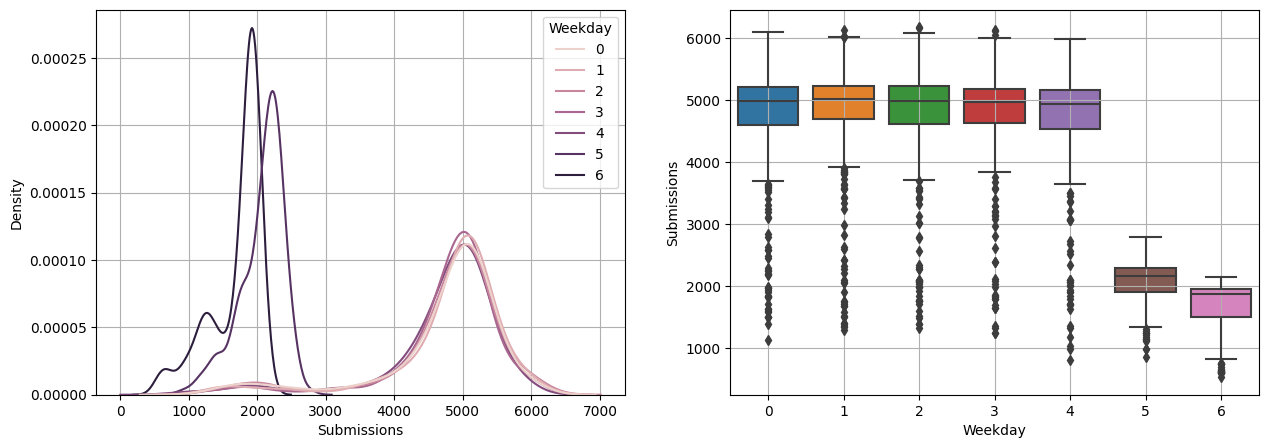

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'Submissions'
hue_var = 'Weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
Submissions,2916.0,3928.127229,1509.300543,527.0,2163.5,4722.5,5110.0,6182.0


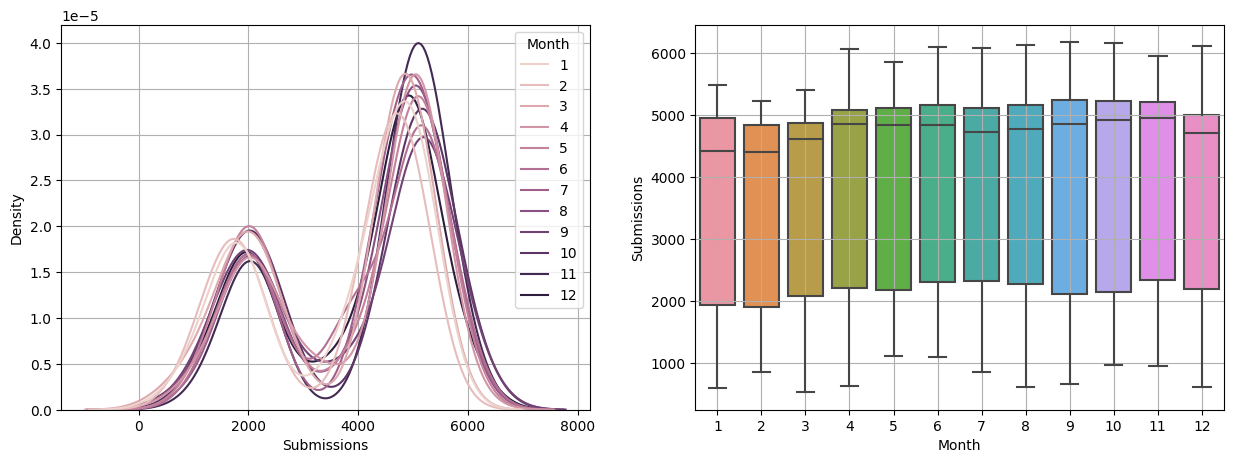

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'Submissions'
hue_var = 'Month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
Submissions,2916.0,3928.127229,1509.300543,527.0,2163.5,4722.5,5110.0,6182.0


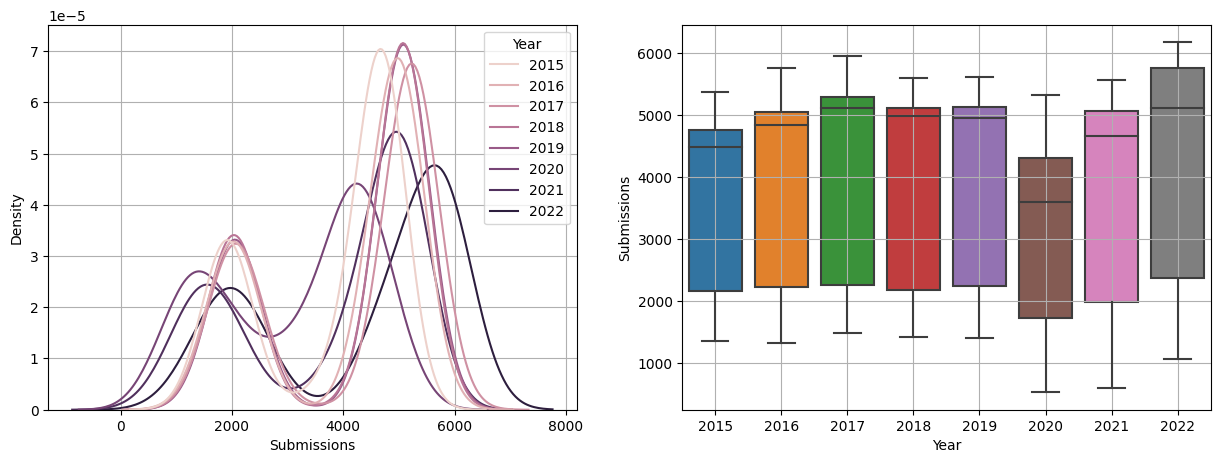

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'Submissions'
hue_var = 'Year'
eda_1_n(data, var, hue_var)

- 요일별 : 평일의 접수건들이 주말보다 2.5배 정도 많음(2000, 5000)
- 월별 : 2000건과 5000건에 많이 분포, 5000건에 더 밀집되어 있다
- 연도별 : 연도가 지남에 따라 증가하다가 2020년 급격히 감소, 그 이후 다시 증가 (아마 코로나)

#### 2) 평균대기시간

,count,mean,std,min,25%,50%,75%,max
Avg_wait,2916.0,40.337037,14.094318,17.6,29.7,38.25,48.7,96.1


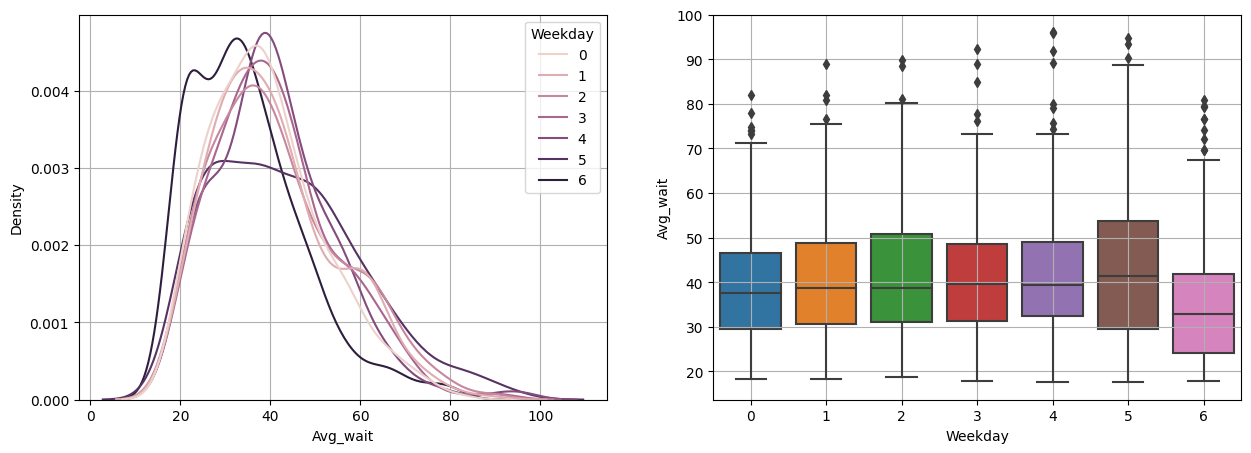

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

var = 'Avg_wait'
hue_var = 'Weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
Avg_wait,2916.0,40.337037,14.094318,17.6,29.7,38.25,48.7,96.1


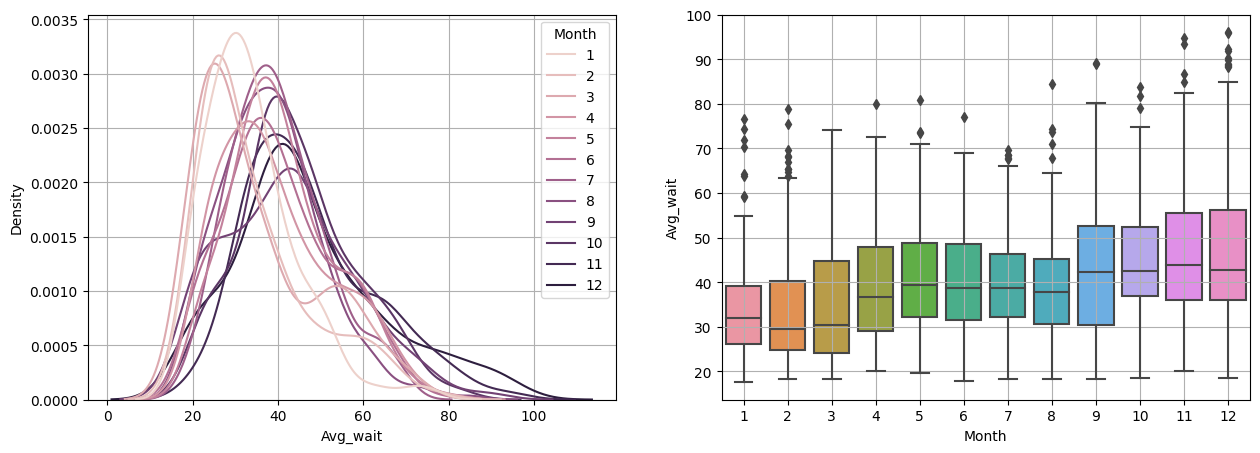

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

var = 'Avg_wait'
hue_var = 'Month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
Avg_wait,2916.0,40.337037,14.094318,17.6,29.7,38.25,48.7,96.1


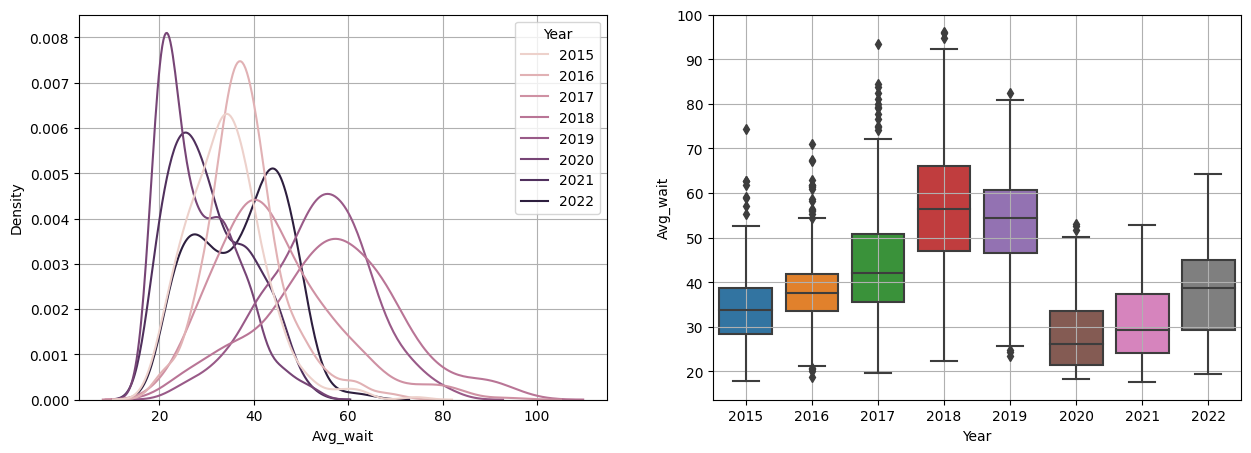

In [22]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

var = 'Avg_wait'
hue_var = 'Year'
eda_1_n(data, var, hue_var)

- 요일별 : 토요일의 대기 시간이 많은 편이고, 일요일은 조금 적다
- 월별 : 겨울 여름 가을 순으로 증가
- 연도별 : 연도가 지남에 따라 증가하다가 2020년 급격히 감소, 그 이후 다시 증가 (아마 코로나)

#### 3) 평균운임

,count,mean,std,min,25%,50%,75%,max
Avg_fare,2916.0,2304.340535,107.382826,2131.0,2228.0,2257.0,2401.0,2733.0


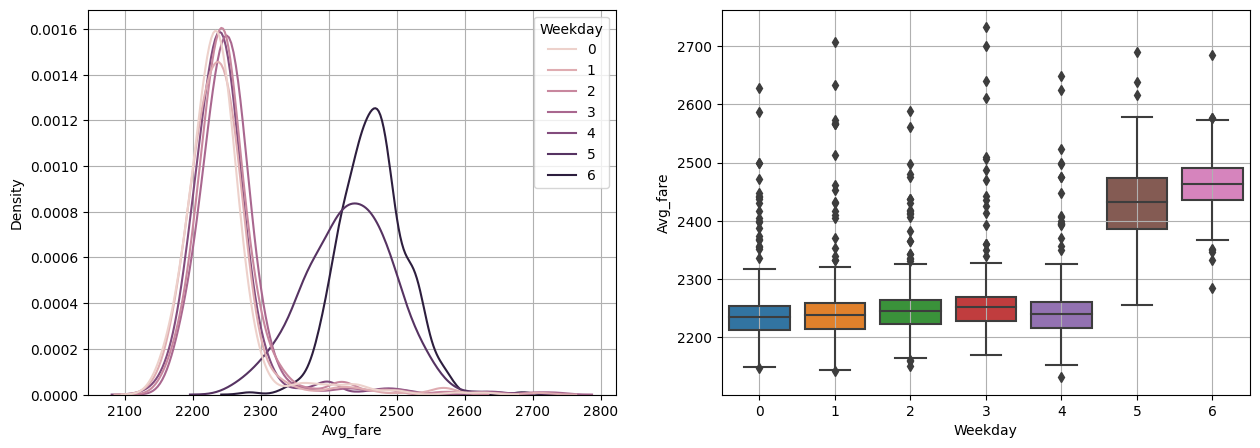

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

var = 'Avg_fare'
hue_var = 'Weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
Avg_fare,2916.0,2304.340535,107.382826,2131.0,2228.0,2257.0,2401.0,2733.0


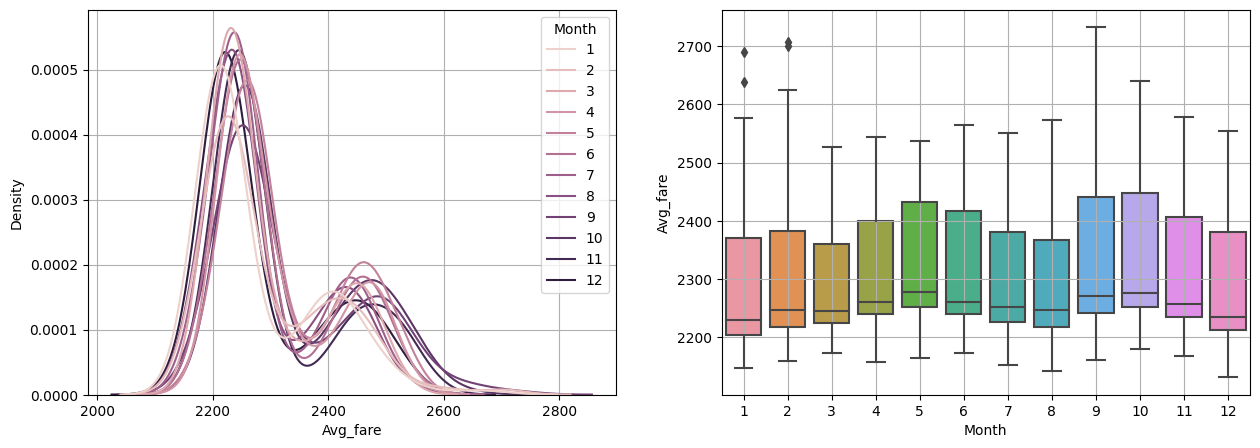

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'Avg_fare'
hue_var = 'Month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
Avg_fare,2916.0,2304.340535,107.382826,2131.0,2228.0,2257.0,2401.0,2733.0


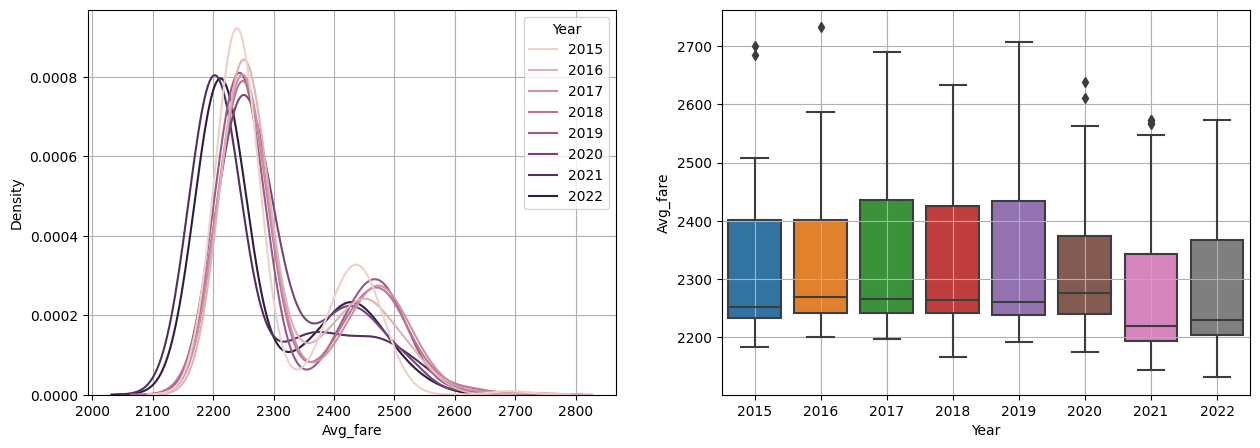

In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'Avg_fare'
hue_var = 'Year'
eda_1_n(data, var, hue_var)

- 요일별 : 평일보다 주말에 운임료를 많이 내는 편이다
- 월별 : 4 ~ 6월, 9~10월에 운임료를 많이 낸다
- 연도별 : 연도가 지남에 따라 증가하다가 2020년 급격히 감소, 그 이후 다시 증가 (아마 코로나)

#### 4) 평균거리

,count,mean,std,min,25%,50%,75%,max
Avg_distance,2916.0,9253.533265,1020.053563,7672.0,8519.0,8821.5,10151.0,14136.0


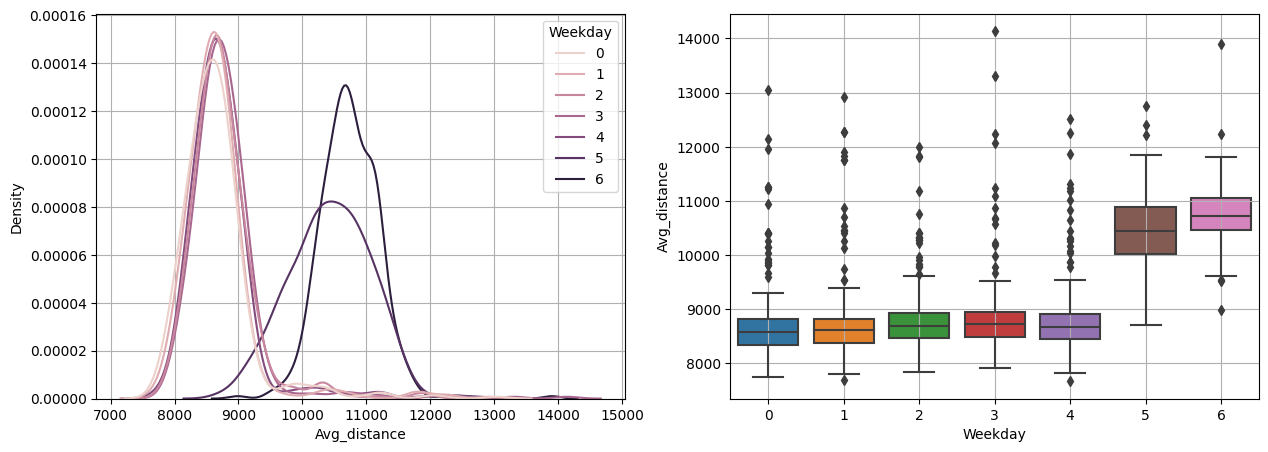

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'Avg_distance'
hue_var = 'Weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
Avg_distance,2916.0,9253.533265,1020.053563,7672.0,8519.0,8821.5,10151.0,14136.0


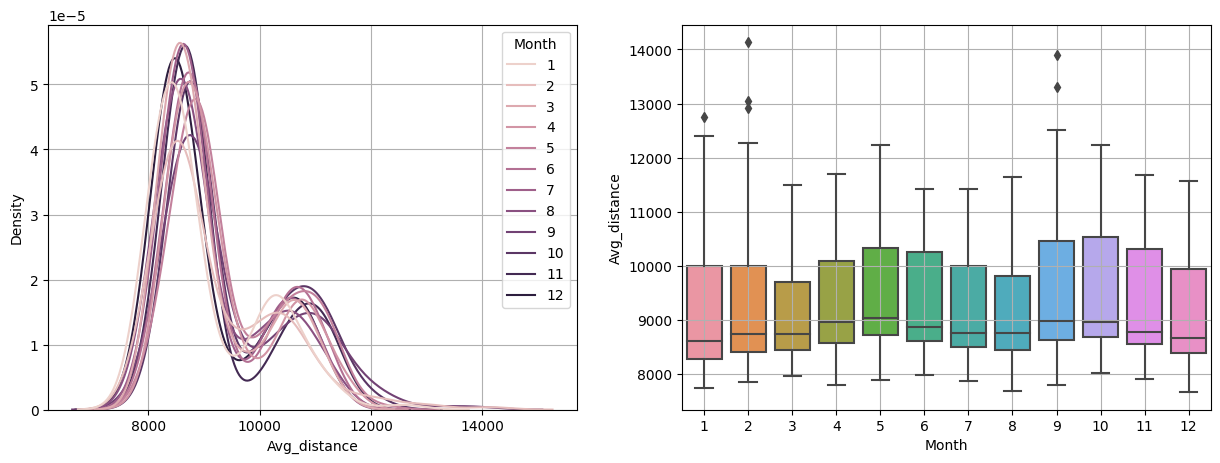

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'Avg_distance'
hue_var = 'Month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
Avg_distance,2916.0,9253.533265,1020.053563,7672.0,8519.0,8821.5,10151.0,14136.0


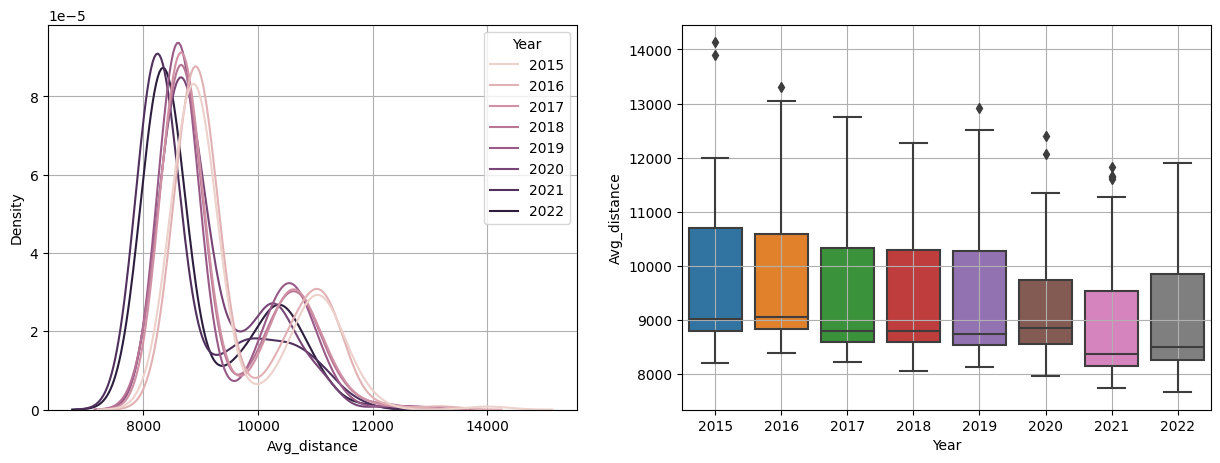

In [24]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'Avg_distance'
hue_var = 'Year'
eda_1_n(data, var, hue_var)

In [18]:
# 요일별 : 평일보다 주말에 이동을 멀리 한다
# 월별 : 4 ~ 6월, 9~10월에 이동을 많이 한다
# 연도별 : 연도가 지남에 따라 감소하는 추세이다

#### 5) 탑승률

,count,mean,std,min,25%,50%,75%,max
Boarding_percent,2916.0,0.841435,0.052143,0.596996,0.805897,0.845545,0.877657,0.968844


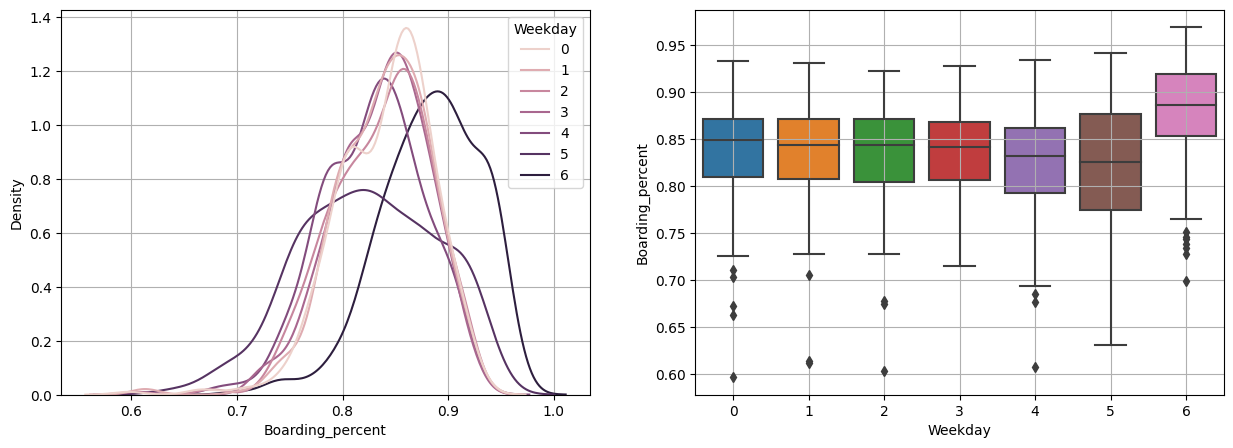

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'Boarding_percent'
hue_var = 'Weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
Boarding_percent,2916.0,0.841435,0.052143,0.596996,0.805897,0.845545,0.877657,0.968844


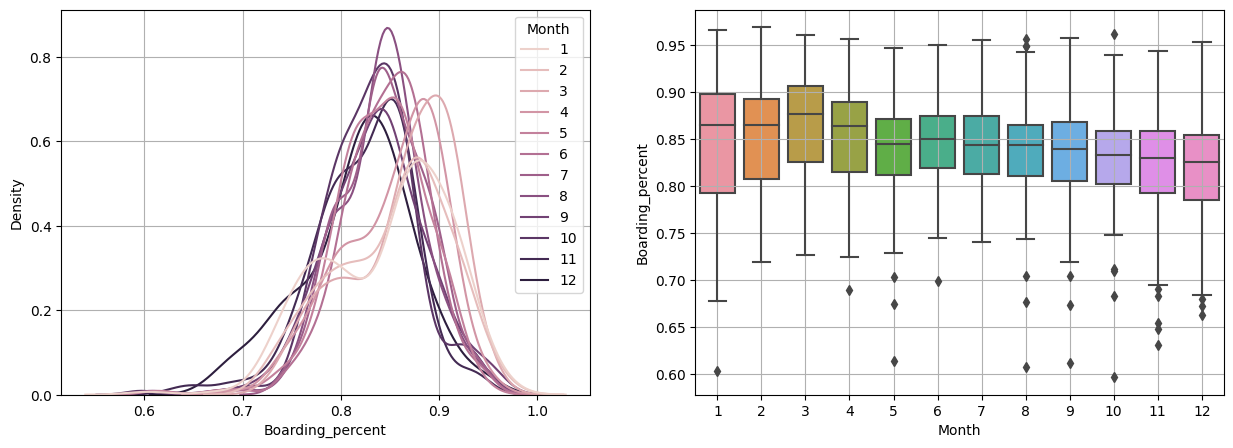

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'Boarding_percent'
hue_var = 'Month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
Boarding_percent,2916.0,0.841435,0.052143,0.596996,0.805897,0.845545,0.877657,0.968844


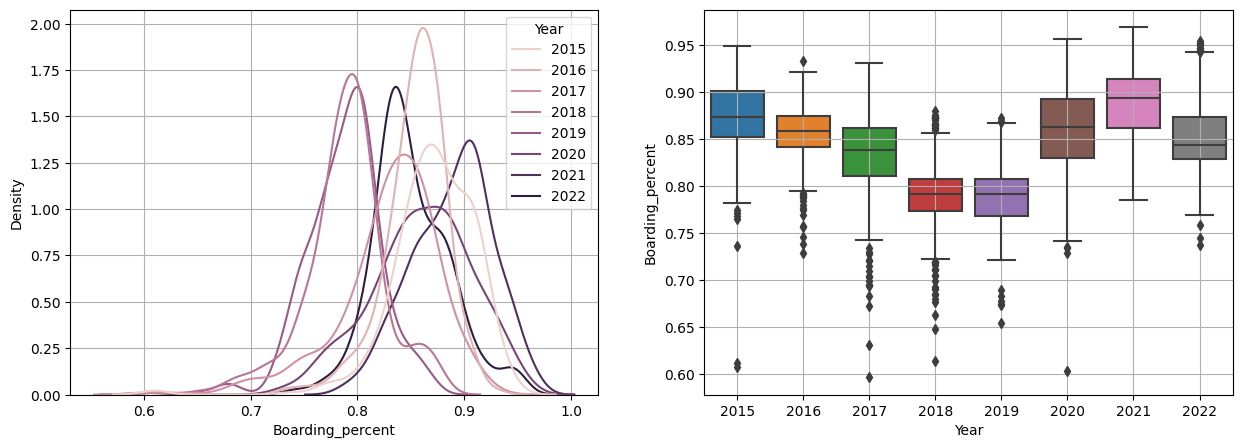

In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'Boarding_percent'
hue_var = 'Year'
eda_1_n(data, var, hue_var)

#### 6) 최고기온(°C)

,count,mean,std,min,25%,50%,75%,max
temp_max,2916.0,18.109979,10.693802,-11.2,9.1,19.7,27.4,39.4


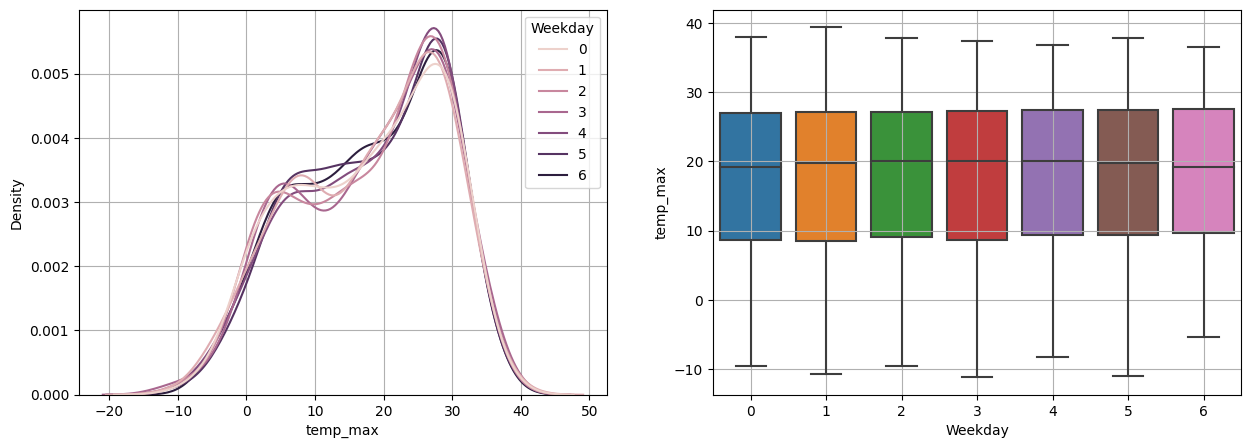

In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

var = 'temp_max'
hue_var = 'Weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
temp_max,2916.0,18.109979,10.693802,-11.2,9.1,19.7,27.4,39.4


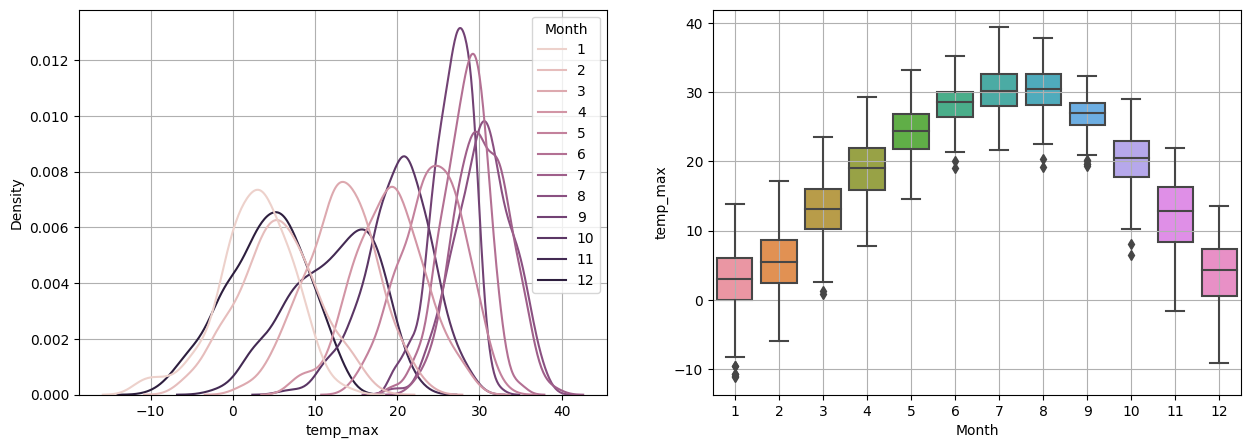

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'temp_max'
hue_var = 'Month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
temp_max,2916.0,18.109979,10.693802,-11.2,9.1,19.7,27.4,39.4


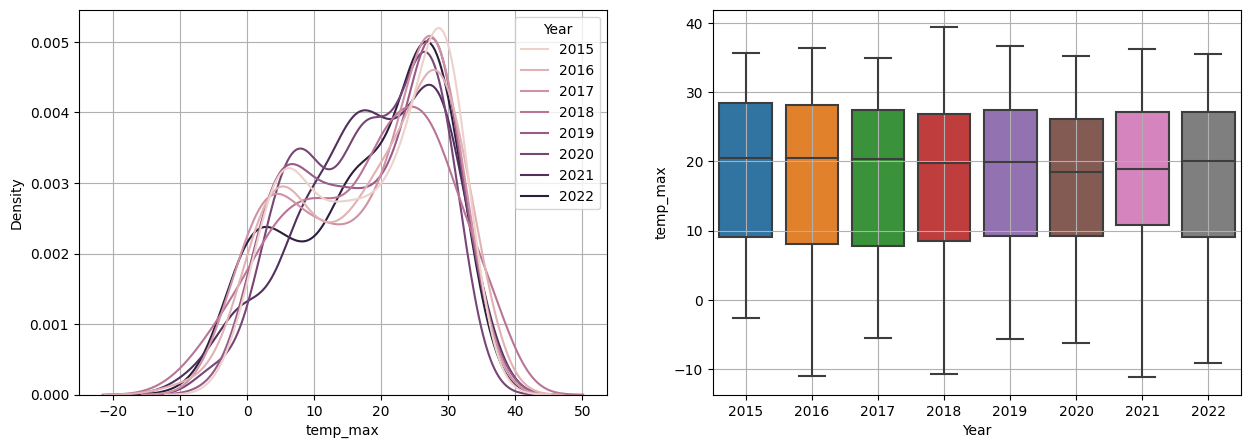

In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'temp_max'
hue_var = 'Year'
eda_1_n(data, var, hue_var)

- 요일별 : 거의 모든 요일 분포 비슷
- 월별 : 여름이 높고 겨울이 낮다
- 연도별 : 거의 모든 연도 비슷

#### 7) 일강수량(mm)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2916.0,3.361351,12.607993,0.0,0.0,0.0,0.3,178.9


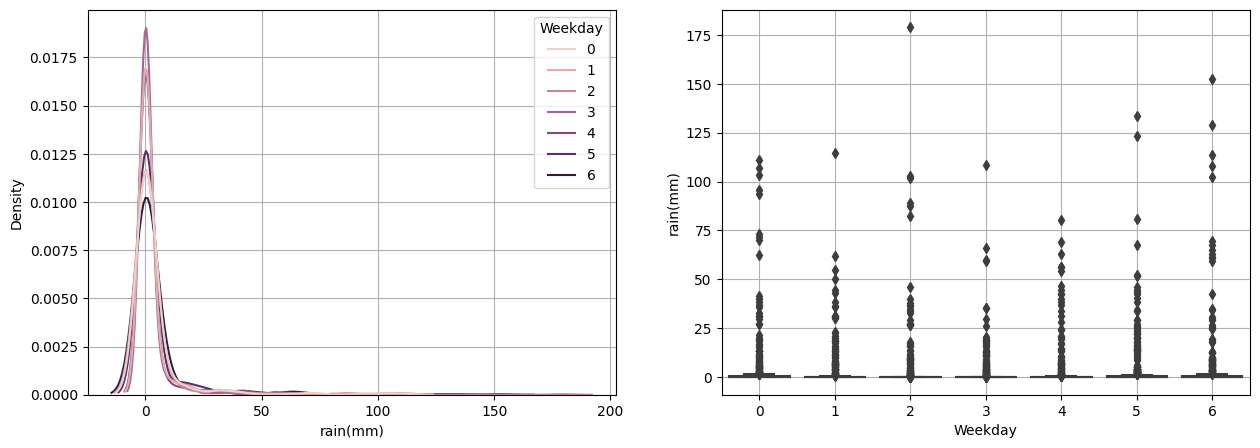

In [30]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'rain(mm)'
hue_var = 'Weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2916.0,3.361351,12.607993,0.0,0.0,0.0,0.3,178.9


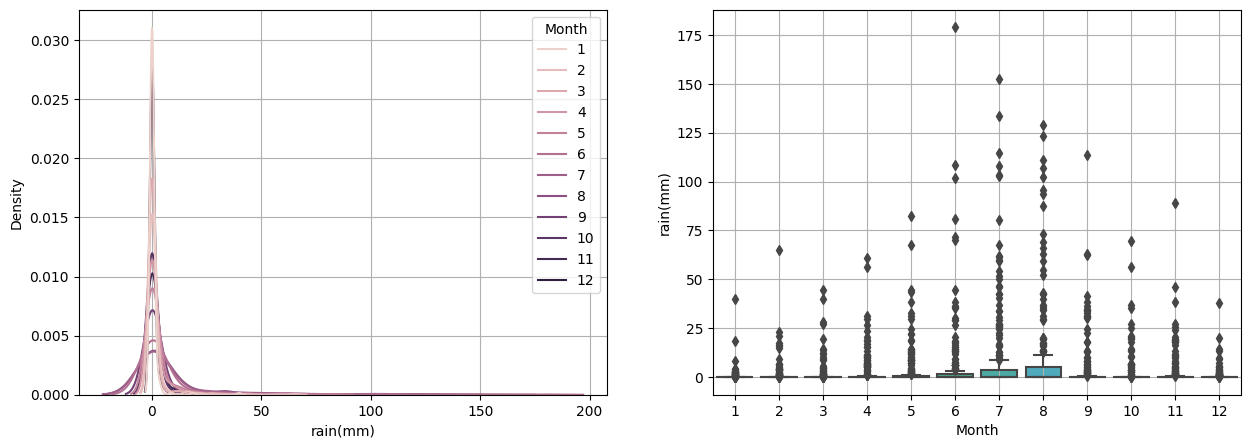

In [31]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'rain(mm)'
hue_var = 'Month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2916.0,3.361351,12.607993,0.0,0.0,0.0,0.3,178.9


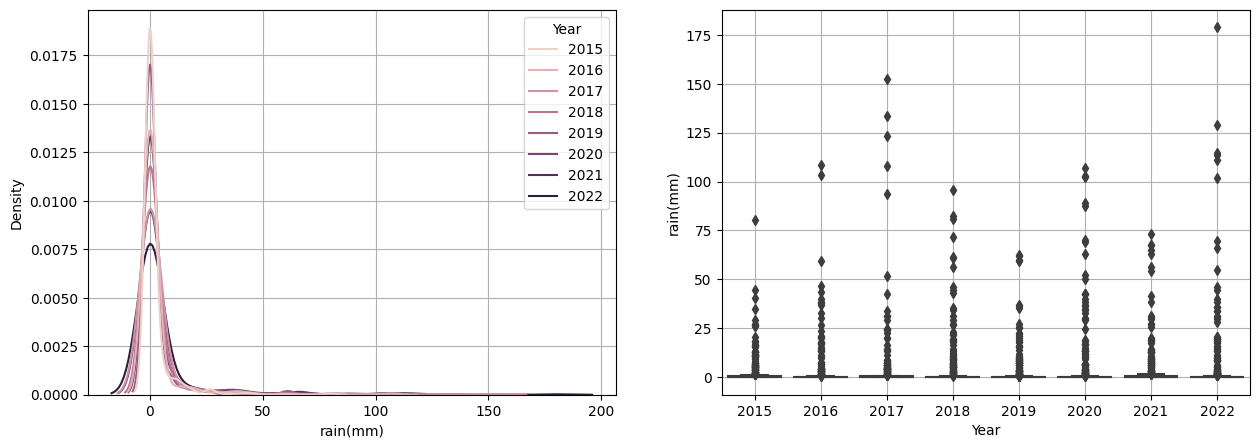

In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'rain(mm)'
hue_var = 'Year'
eda_1_n(data, var, hue_var)

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

In [40]:
# 범주형 변수 분석
def categorical_analysis(data, col, normalize=False):
    display(data[col].value_counts(normalize=normalize))
    sns.countplot(x=data[col])
    plt.show()

Spring    736
Summer    736
Fall      729
Winter    715
Name: season, dtype: int64

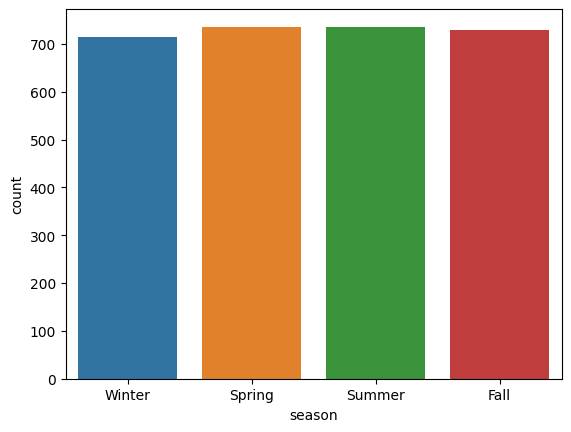

In [41]:
categorical_analysis(data, 'season')

2    417
3    417
4    417
1    417
5    416
6    416
0    416
Name: Weekday, dtype: int64

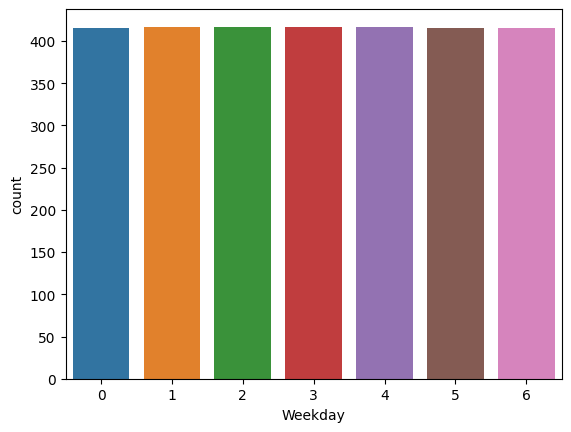

In [42]:
categorical_analysis(data, 'Weekday')

10    249
3     248
5     248
7     248
8     248
12    247
1     242
4     240
6     240
9     240
11    240
2     226
Name: Month, dtype: int64

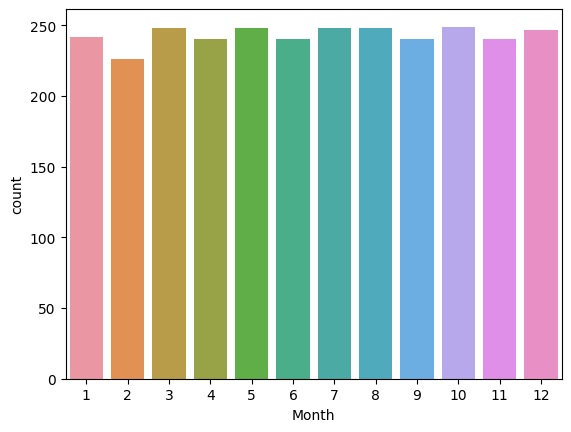

In [43]:
categorical_analysis(data, 'Month')

0    2084
1     832
Name: Weekend, dtype: int64

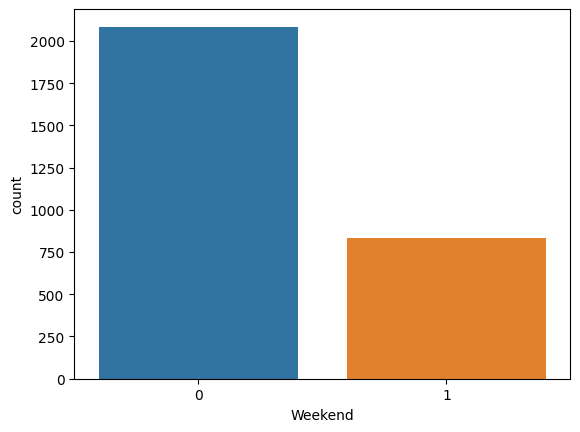

In [44]:
# 주중에 많이 이용

categorical_analysis(data, 'Weekend')

0    2797
1     119
Name: holiday, dtype: int64

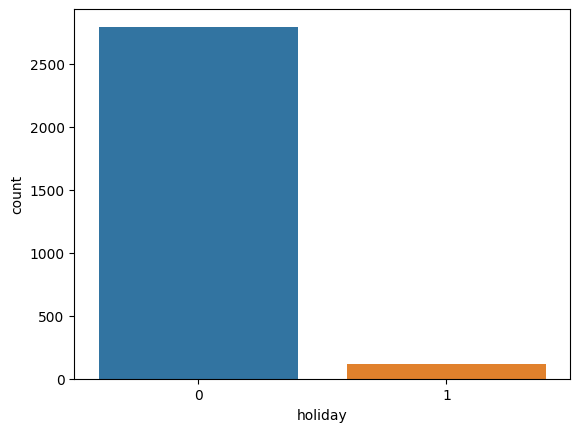

In [45]:
# 공휴일 아닐 때 많이이용

categorical_analysis(data, 'holiday')

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

In [51]:
num_cols = data.select_dtypes([int, float]).columns
num_cols

Index(['Cars', 'Submissions', 'Boardings', 'Avg_wait', 'Avg_fare',
       'Avg_distance', 'target', 'temp_max', 'temp_min', 'rain(mm)',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 'Weekday',
       'Month', 'Year', 'Weekend', 'holiday', 'Wait_MA7', 'Boarding_percent'],
      dtype='object')

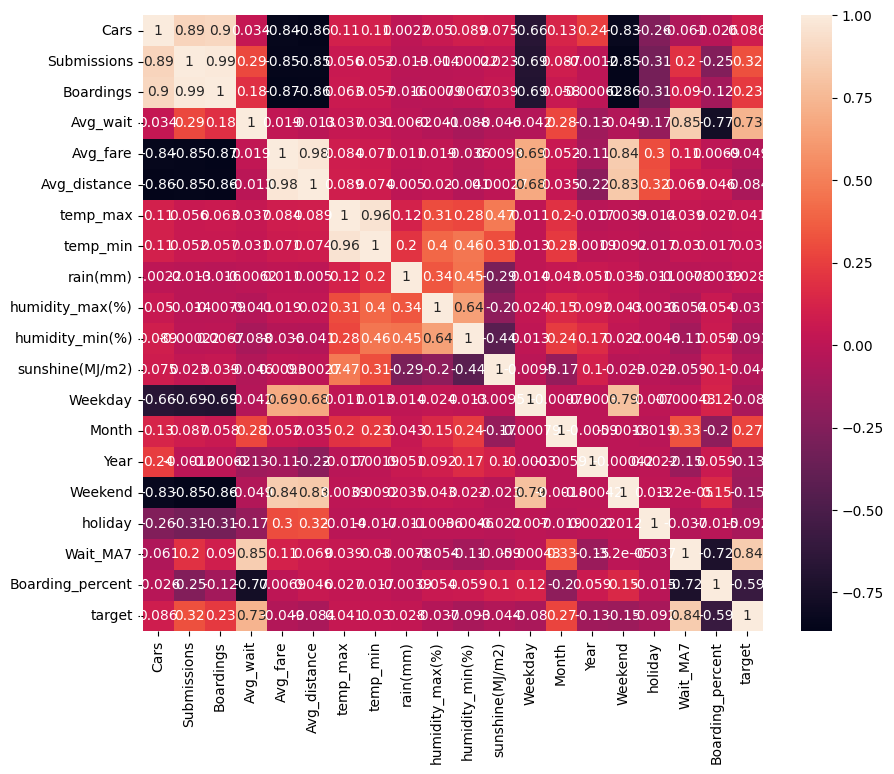

In [53]:
# 전체 상관관계를 한눈에 보여주기 함수

temp = data[num_cols].drop('target', axis=1)
temp['target'] = data['target']

corr = temp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

#### 2) 산점도

In [54]:
def eda_2_nn(data, target, var, hue = ''):

    plt.figure(figsize = (8,8))
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

* 평균 대기 시간

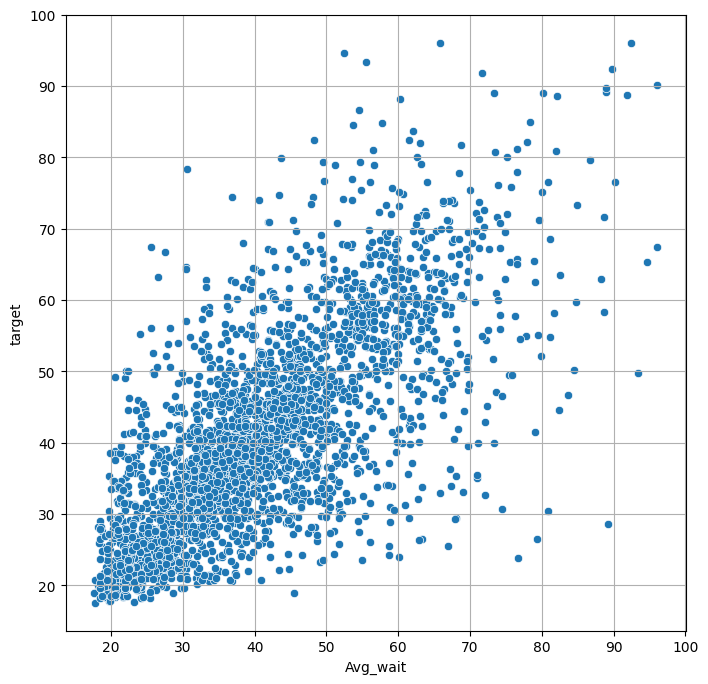

In [56]:
eda_2_nn(data, 'target', 'Avg_wait')

- 탑승률

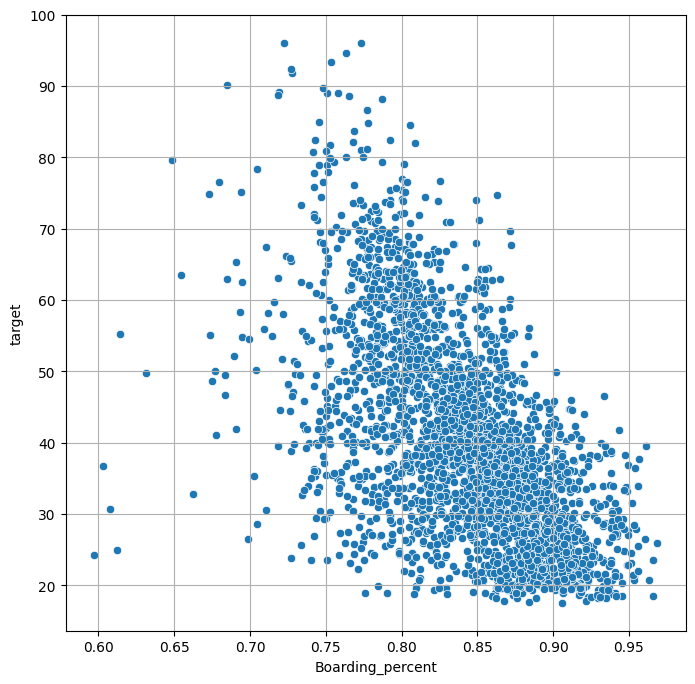

In [59]:
eda_2_nn(data, 'target', 'Boarding_percent')

In [61]:
# 7일 평균 대기시간이 대기시간이랑 양의 상관관계, 탑승률과 대기시간 음의 상관관계

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

* 휴일 여부

<Axes: xlabel='holiday', ylabel='target'>

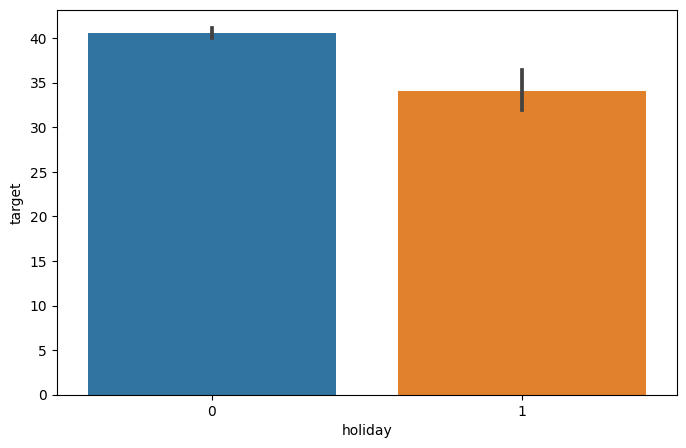

In [62]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 공휴일이 아닌 값이 target과 유의하게 높은 것으로 나타남

plt.figure(figsize=(8, 5))
sns.barplot(x='holiday', y='target', data=data)

* 요일

<Axes: xlabel='Weekday', ylabel='target'>

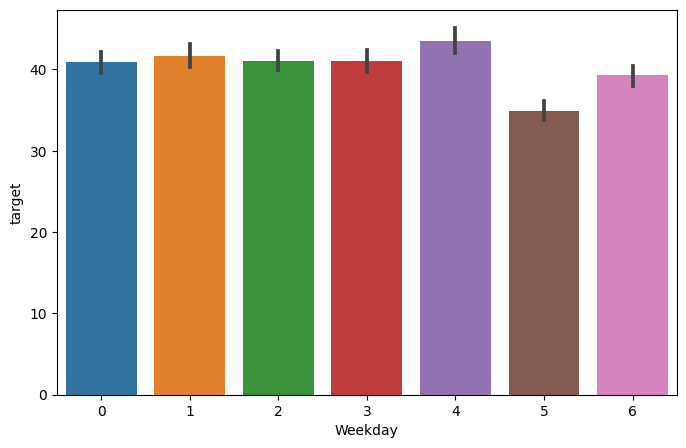

In [63]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# weekday와 target은 t검정 결과 p-value가 작게 나와 휴일 여부가 'target'에 유의미한 영향?

plt.figure(figsize=(8, 5))
sns.barplot(x='Weekday', y='target', data=data)

* 계절

<Axes: xlabel='season', ylabel='target'>

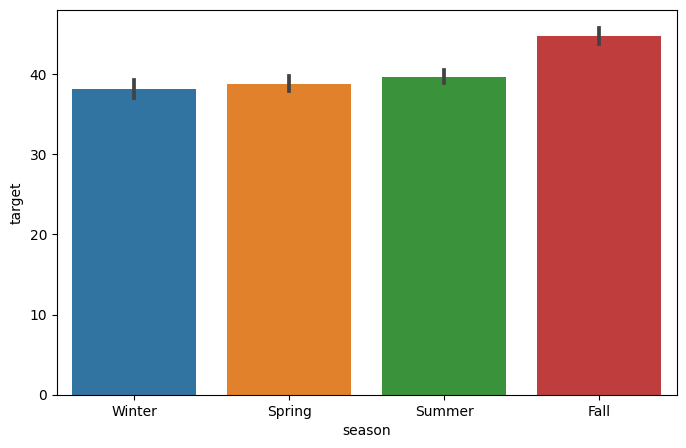

In [64]:
# season 변수는 Anova분석 결과 p-value가 유의수준보다 작게 나와 계절이 target에 영향을 미친다

plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='target', data=data)

In [67]:
# t-test (범주가 2개인 경우 : Weekend, Holidays)
cols = ['Weekend', 'holiday']
for col in cols:
    a = data.loc[data[col]==0, 'target']
    b = data.loc[data[col]==1, 'target']
    print(col, ":", spst.ttest_ind(a, b))

Weekend : TtestResult(statistic=7.925335537560185, pvalue=3.2103752552329826e-15, df=2914.0)
holiday : TtestResult(statistic=4.973127492245636, pvalue=6.969982354954504e-07, df=2914.0)


In [69]:
# ANOVA(분산 분석) (범주가 3개 이상인 경우 : Weekday, Month, season)
cols = ['Weekday', 'Month', 'season']
for col in cols:
    classes = data[col].unique()
    for i in range(len(classes)):
        globals()[f'p_{i}'] = data.loc[data[col] == classes[i], 'target']
    input_list = [globals()[f'p_{i}'] for i in range(len(classes))]
    print(col, ":", spst.f_oneway(*input_list))
     

Weekday : F_onewayResult(statistic=15.703096319056057, pvalue=7.977136666044691e-18)
Month : F_onewayResult(statistic=25.41619502755956, pvalue=6.481618237840667e-51)
season : F_onewayResult(statistic=34.025404008401615, pvalue=1.310090610349084e-21)


## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

In [ ]:
# 평균 대기시간, 전날의 평균 대기시간, 탑승률, holiday, Weekday, season, 접수 건수, 탑승 건수 가 높게?

* 강한 관계의 변수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# high_cols = ['Wait_MA7', 'Avg_wait', 'Boarding_percent', 'Weekend', 'Holidays', 'Weekday', 'Month', 'Season']

* 중간(약한) 관계의 변수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


# mid_cols = ['Submissions', 'Boardings', 'humidity_min(%)']

* (거의) 관계가 없는 변수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# low_cols = ['Cars', 'Avg_distance', 'Avg_fare', 'sunshine(MJ/m2)', 'temp_max', 'humidity_max(%)', 'temp_min', 'rain(mm)']

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [ ]:
import joblib

# 데이터 저장
joblib.dump(data, 'data2.pkl')